In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ba_users = pd.read_csv("../data/processed/new_ba_users.csv")
ba_reviews = pd.read_csv("../data/processed/new_ba_reviews.csv")

# Dunning-Kruger effect: l'illusion de l'expertise 

Individuals with lower expertise in a field tend to overestimate their abilities, while experts tend to be more modest.

methods : 
- classer les utilisateurs en fonction du nombre de reviews qu'ils ont
- premières observations visible du Dunning Kruger effect
- donner une note de "performance" (par rapport au groupe, par exemple) : A quel point la note donnée est pertinente ?
- en déduire des graphes de performances "réelles" contre performance "estimée" selon les groupes.
- donner une note de "confiance" (par rapport au groupe), et montrer que les novices et experts ont tendances à avoir confiance, mais les intermédiaires, moins. 

(voir https://en.wikipedia.org/wiki/Dunning%E2%80%93Kruger_effect)
(voir https://thedecisionlab.com/biases/dunning-kruger-effect)

In [11]:
ba_users["nbr_reviews"].describe()

count    153704.000000
mean         16.847876
std         139.846706
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8970.000000
Name: nbr_reviews, dtype: float64

In [41]:
def experience_group(nbr_ratings: int) -> str:
    index = nbr_ratings > np.logspace(0,4,10).astype(int)
    return index.sum()
ba_users["experience_group"] = ba_users["nbr_ratings"].apply(experience_group)

In [47]:
ba_reviews["experience_group"] = ba_reviews["user_id"].apply(dict(zip(ba_users['user_id'], ba_users['experience_group'])).get)

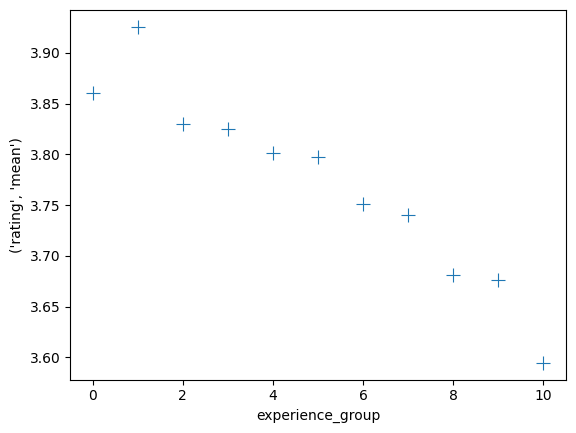

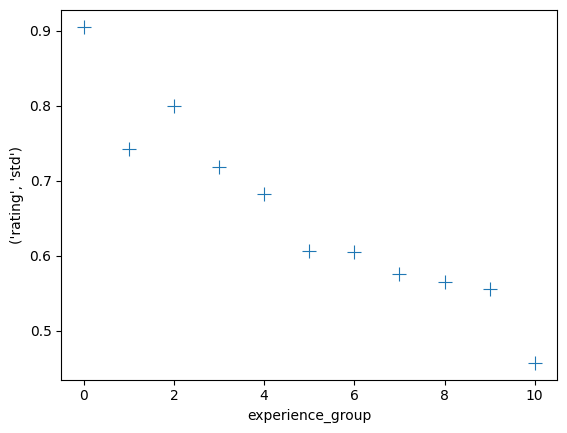

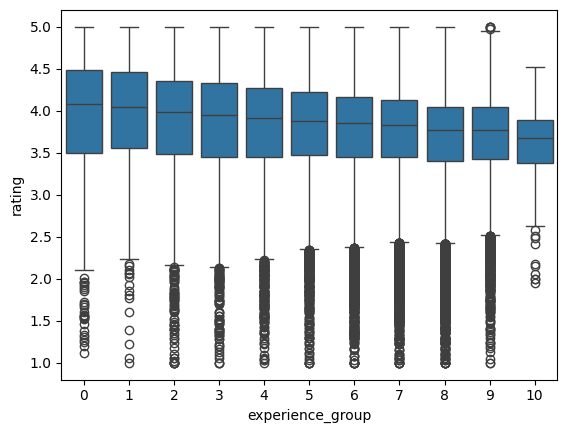

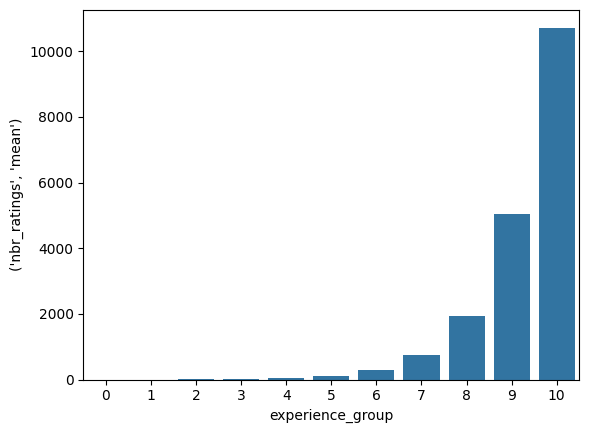

In [76]:
sns.scatterplot(ba_reviews.groupby("experience_group").agg({"rating":["mean","median","std"]}).reset_index(),
                x="experience_group",
                y=("rating","mean"),
                marker='+',
                s=100)
plt.show()

sns.scatterplot(ba_reviews.groupby("experience_group").agg({"rating":["mean","median","std"]}).reset_index(),
                x="experience_group",
                y=("rating","std"),
                marker='+',
                s=100)
plt.show()

sns.boxplot(ba_reviews,
            x="experience_group",
            y="rating",)
plt.show()

sns.barplot(ba_users.groupby("experience_group").agg({"nbr_ratings":["count","mean"]}).reset_index(),
                x="experience_group",
                y=("nbr_ratings","mean"),
                # marker='+',
                # s=100
           )
plt.show()

# Confirmation bias 
Confirmation bias : our tendency to assign more value to—and try to obtain—information and ideas that match those we already believe, thereby confirming our existing stance or suspicions.


Est-ce que les utilisateurs favorisent leurs bières préférées indépendemment de la qualité réelle ?
La réputation d'une bière influence-t-elle les notes individuelles ?

méthodes : 
- Etablir "la qualité réelle d'une bière" : moyenne des notes ?  
- Trouver des bières similaires, et étudier leurs différences de notes. Qu'est ce qui explique cette différence ? (réputation/branding)
- régression linéaire : variables explicatives : [composition, alcool, zone, ancienneté] variable expliquée : [rating de la biere]. (= On aura un R2 mauvais, ce qui implique que d'autres facteurs impact le rating, probalement le nombre de ratings aupravant, les notes précédentes, donc la réputation) 